# Figure 1

This notebook must be run within the `benchmark_env` environment.

In [2]:
library(tidyverse)
library(ggplot2)
library(ggridges)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── ti

## Figure S1A

In [3]:
geneset_sz = readr::read_tsv("outputs/geneset_sz.tsv")

Rows: 2939 Columns: 3
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): lib_name, descr
dbl (1): num_genes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
geneset_sz <- geneset_sz %>%
  mutate(lib_name = case_when(
    lib_name == "KEGG_2021_Human" ~ "KEGG",
    lib_name == "Reactome_2022" ~ "Reactome",
    lib_name == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ lib_name  # Leave other values unchanged
  ))

In [ ]:
head(geneset_sz)

lib_name,descr,num_genes
<chr>,<chr>,<dbl>
KEGG,ABC transporters,45
KEGG,AGE-RAGE signaling pathway in diabetic complications,100
KEGG,AMPK signaling pathway,120
KEGG,Acute myeloid leukemia,67
KEGG,Adherens junction,71
KEGG,Adipocytokine signaling pathway,69


In [6]:
unique(geneset_sz$lib_name)

[1] "KEGG"         "Reactome"     "WikiPathways"

In [7]:
# Count the number of gene sets per lib_name
gene_set_counts <- geneset_sz %>%
  group_by(lib_name) %>%
  summarise(num_gene_sets = n()) 
sum(gene_set_counts$num_gene_sets)
gene_set_counts

[1] 2939

lib_name,num_gene_sets
<chr>,<int>
KEGG,320
Reactome,1818
WikiPathways,801


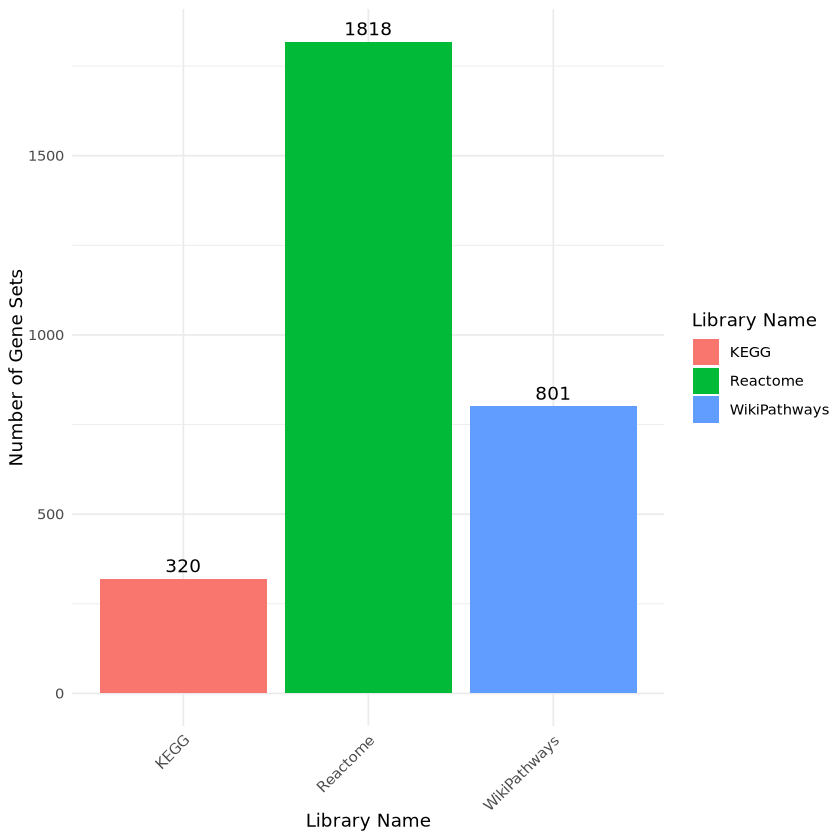

In [8]:
p <- ggplot(gene_set_counts, aes(x = lib_name, y = num_gene_sets, fill = lib_name)) +
  geom_bar(stat = "identity") +  # Create the bar plot
  geom_text(aes(label = num_gene_sets), vjust = -0.5) +  # Add the values above the bars
  theme_minimal() +  # Use a minimal theme
  labs(x = "Library Name", y = "Number of Gene Sets") +  # No title specified
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for better readability
  scale_fill_discrete(name = "Library Name")  # Change legend title to "Library Name"
ggsave(p, file="figures/figs1a.pdf", width=4, height=5)
p

# Figure S1B

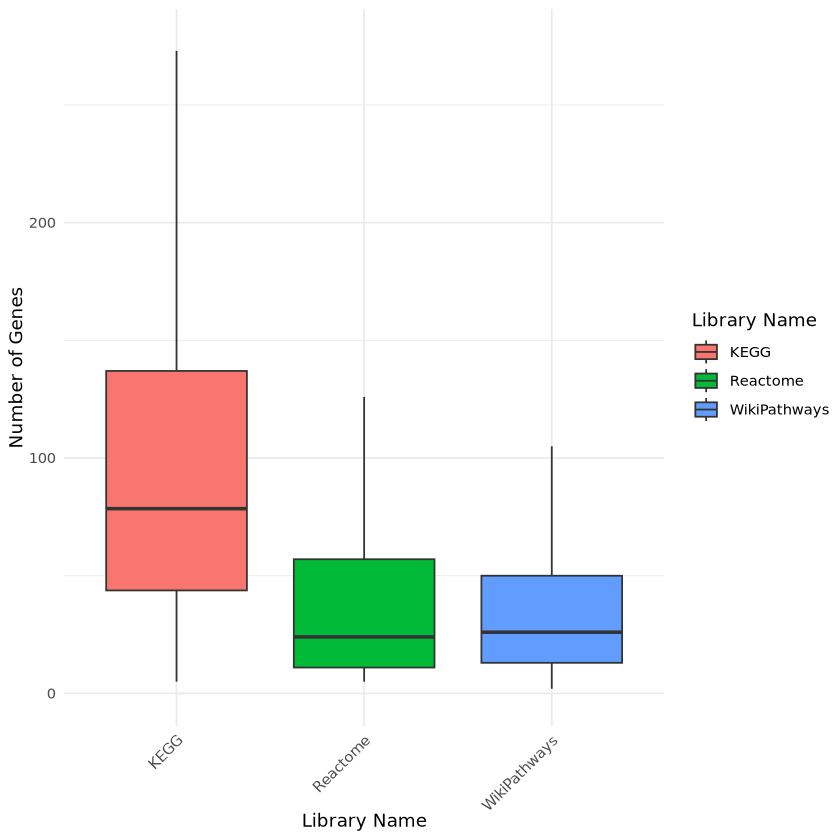

In [9]:

limits <- geneset_sz %>%
  group_by(lib_name) %>%
  summarize(ymin = max(0, quantile(num_genes, 0.25) - 1.5 * IQR(num_genes)),
            ymax = quantile(num_genes, 0.75) + 1.5 * IQR(num_genes))

# Create the boxplot with limits based on whiskers
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill=lib_name)) +
  geom_boxplot(outlier.shape = NA) +  # Create the boxplot without outliers
  theme_minimal() +  # Use a minimal theme
  labs(x = "Library Name", y = "Number of Genes") +  # Set axis labels
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  coord_cartesian(ylim = range(limits$ymin, limits$ymax)) + # Set y-axis limits based on whiskers
scale_fill_discrete(name = "Library Name") 
ggsave(p, file="figures/figs1b.pdf",width=4, height=5)

p

## Figure 1C

In [10]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
df <- df %>% filter(gene_set == "llm_genes_role")
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 44085 Columns: 17
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
#head(df)
unique(df$model)
unique(df$database)

[1] GPT-4o mini GPT-3.5     GPT-4o     
Levels: GPT-3.5 GPT-4o mini GPT-4o

[1] "KEGG"         "Reactome"     "WikiPathways"

In [12]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)
min(percentage_df$percentage)
max(percentage_df$percentage)

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


[1] 66.06161

[1] 94.375

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


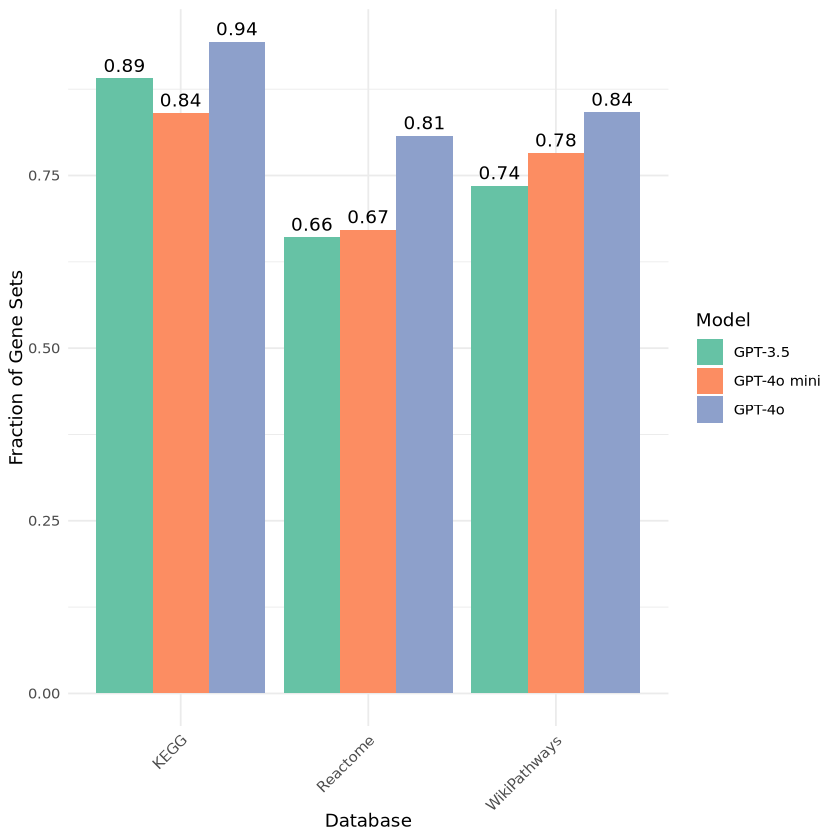

In [13]:

# Step 4: Group by 'database' and 'model' and calculate the fraction of p_val_adj < 0.01
fraction_df <- df %>%
  group_by(database, model) %>%
  summarize(fraction_below_0_01 = mean(p_val_adj < 0.01)) %>%
  ungroup()  # Ungroup to avoid issues with subsequent operations

# Step 5: Create the bar plot grouped by 'database' and colored by 'model', with fraction above each bar
p <- ggplot(fraction_df, aes(x = database, y = fraction_below_0_01, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create grouped bar plot
  geom_text(aes(label = round(fraction_below_0_01, 2)),  # Add text with the rounded fraction
            position = position_dodge(width = 0.9),      # Adjust position for dodged bars
            vjust = -0.5) +                              # Move the text above the bars
  theme_minimal() +  # Use a minimal theme
  labs(x = "Database", y = "Fraction of Gene Sets") +  # Update y-axis label
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set2", name = "Model")  # Set color palette for models

p

In [14]:
ggsave(p, file="figures/fig1c.pdf", width=7,height=5)

## Figure 1D

In [15]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
df <- df %>% filter(gene_set == "llm_genes_role")
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 44085 Columns: 17
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
# Assuming df is the data frame with columns database, model, descr, and p_val
# Step 1: Select the relevant columns
df_selected <- df %>%
  select(database, model, descr, p_val)

# Step 2: Reshape the data so that each value of 'model' is in a separate column
df_wide <- df_selected %>%
  pivot_wider(names_from = model, values_from = p_val)

# View the reshaped data
df_wide <- df_wide %>%
  rename(
    GPT4o_mini = `GPT-4o mini`,       # Rename 'GPT-4o mini' to 'GPT4o_mini'
    GPT3_5 = `GPT-3.5`,               # Rename 'GPT-3.5' to 'GPT3_5'
    GPT4o = `GPT-4o`                  # Rename 'GPT-4o' to 'GPT4o'
  )

head(df_wide)

database,descr,GPT4o_mini,GPT3_5,GPT4o
<chr>,<chr>,<dbl>,<dbl>,<dbl>
KEGG,ABC transporters,3.079999e-68,1.224149e-27,3.478219e-115
KEGG,AGE-RAGE signaling pathway in diabetic complications,3.742895e-14,5.418608e-30,1.181686e-25
KEGG,AMPK signaling pathway,1.444675e-24,4.846371e-38,8.191621e-66
KEGG,Acute myeloid leukemia,7.350817e-09,9.488063e-09,2.570267e-10
KEGG,Adherens junction,1.992364e-07,1.869181e-08,3.183117e-20
KEGG,Adipocytokine signaling pathway,4.841744e-19,7.036167e-45,3.256808e-25


`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


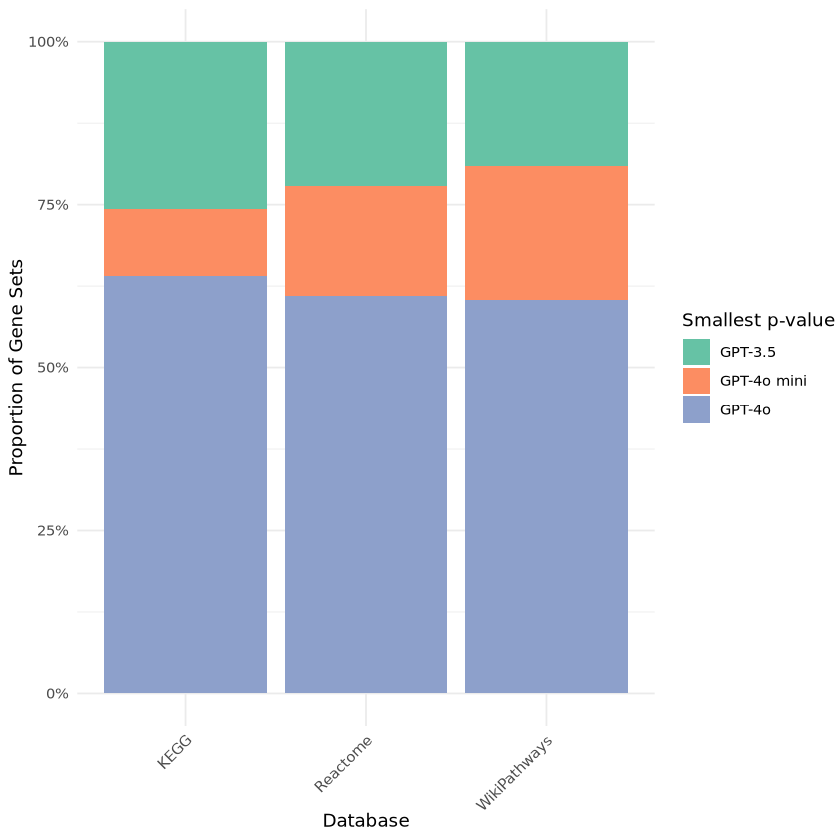

In [17]:
df_wide <- df_wide %>%
  mutate(
    smallest_column = case_when(
      GPT4o_mini == pmin(GPT4o_mini, GPT3_5, GPT4o) ~ "GPT4o_mini",
      GPT3_5 == pmin(GPT4o_mini, GPT3_5, GPT4o) ~ "GPT3_5",
      GPT4o == pmin(GPT4o_mini, GPT3_5, GPT4o) ~ "GPT4o"
    )
  )


df_wide <- df_wide %>%
  mutate(smallest_column = case_when(
    smallest_column == "GPT3_5" ~ "GPT-3.5",
    smallest_column == "GPT4o_mini" ~ "GPT-4o mini",
    smallest_column == "GPT4o" ~ "GPT-4o",
    TRUE ~ smallest_column  # Leave other values unchanged
  ))
# Step 3: Set the order of the 'model' factor
df_wide <- df_wide %>%
  mutate(smallest_column = factor(smallest_column, 
                                  levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))

# Step 1: Group by 'database' and 'smallest_column' and count occurrences
df_proportional <- df_wide %>%
  group_by(database, smallest_column) %>%
  summarize(count = n()) %>%
  mutate(proportion = count / sum(count)) %>%
  ungroup()

# Step 2: Generate the proportional bar plot using ggplot2 with Set2 color scheme
p <- ggplot(df_proportional, aes(x = database, y = proportion, fill = smallest_column)) +
  geom_bar(stat = "identity", position = "fill") +  # Create proportional bar plot
  labs(x = "Database", y = "Proportion of Gene Sets", fill = "Smallest p-value") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  scale_y_continuous(labels = scales::percent_format()) +  # Show proportions as percentages
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set2")  # Apply Set2 color scheme
p

In [18]:
ggsave(p, file="figures/fig1d.pdf", width=5, height=5)

In [19]:
head(filtered_df)

ERROR: Error: object 'filtered_df' not found


## Figure S1x (Jacqueline)

Rows: 44085 Columns: 17
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", :
“Ignoring unknown parameters: `size`”
Warning message in geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", :
“Ignoring unknown parameters: `size`”
Picking joint bandwidth of 0.0599

Picking joint bandwidth of 0.0419

Picking joint bandwidth of 0.0528

Picking joint bandwidth of 0.0413

Picking joint bandwidth of 0.0376

Picking joint bandwidth of 0.0512



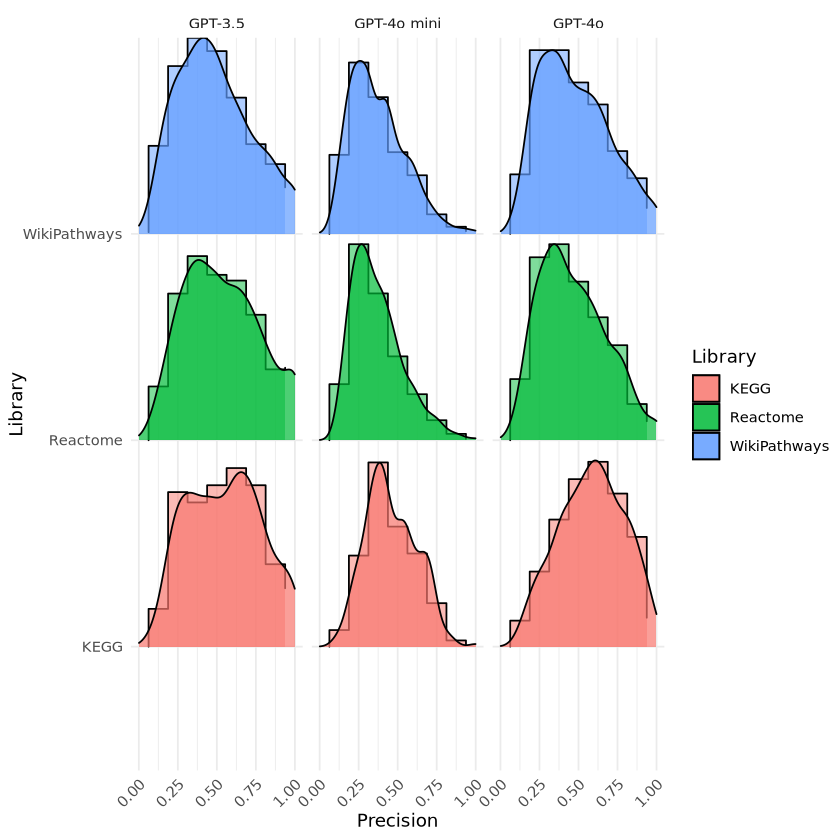


	Pearson's product-moment correlation

data:  df$ncurated and -log10(df$p_val)
t = 15.998, df = 8815, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1476192 0.1881891
sample estimates:
      cor 
0.1679753 



Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 620 rows containing non-finite outside the scale range (`stat_smooth()`).”


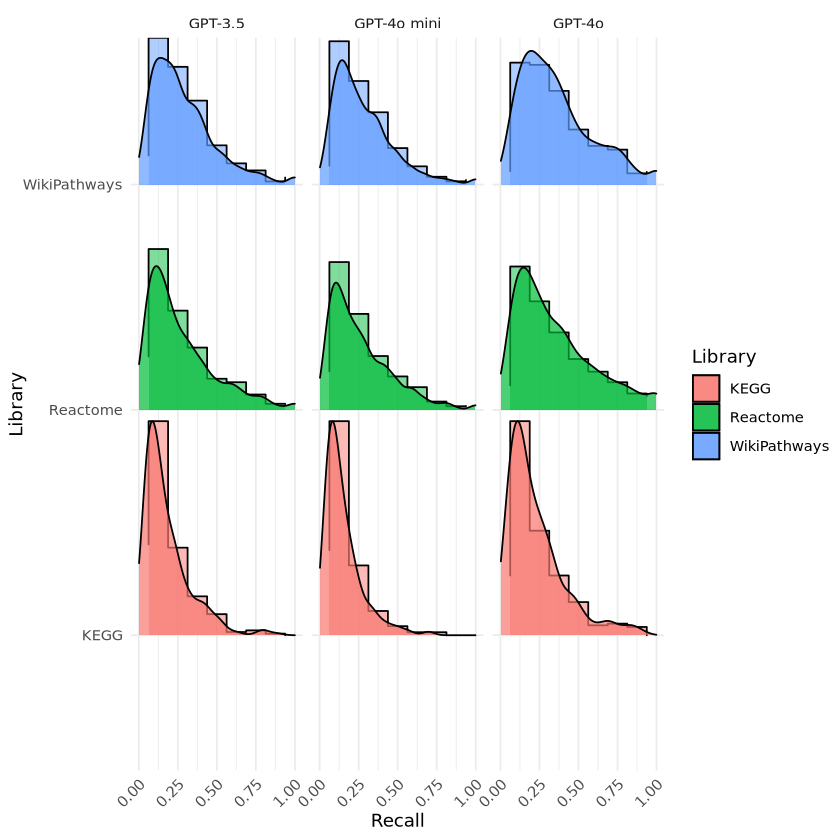

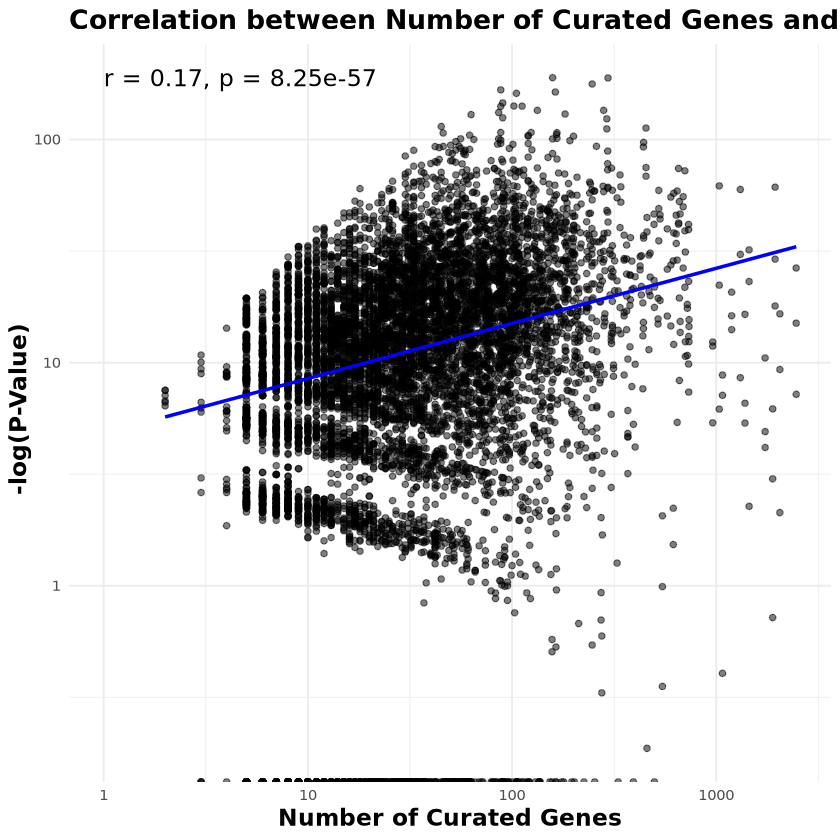

In [21]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
df <- df %>% filter(gene_set == "llm_genes_role")
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))

# Jacqueline: Can you make this figure better. Split facet by model and database. 
# Filter the dataframe for rows where p_val_adj < 0.01
filtered_df <- df %>% filter(p_val_adj < 0.01)


# Create the histograms
p1 <- ggplot(filtered_df, aes(x = richFactor, y=database, fill = database)) +
  geom_density_ridges(stat = "binline", bins = 9, scale = 0.95, draw_baseline = FALSE, alpha = 0.5) +  # Binned density ridges
  geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", size = 0.3) +  # Smooth density ridges
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Precision", y = "Library", fill = "Library") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + # Rotate x-axis labels for readability
  xlim(0, 1) # Set x-axis limits

p2 <- ggplot(filtered_df, aes(x = generatio, y=database, fill = database)) +
  geom_density_ridges(stat = "binline", bins = 9, scale = 0.95, draw_baseline = FALSE, alpha = 0.5) +  # Binned density ridges
  geom_density_ridges(scale = 0.95, alpha = 0.7, color = "black", size = 0.3) +  # Smooth density ridges
  facet_wrap(~ model) +  # Facet the plot by 'model'
  labs(x = "Recall", y = "Library", fill = "Library") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  + # Rotate x-axis labels for readability
  xlim(0, 1)  # Set x-axis limits


# Print the histograms
print(p1)
print(p2)

# Jacqueline, can you improve this figure? Not sure this is the right thing to plot to address
# the reviewer comments. 
# Fraction signifcant and the gene set size. 
# x - axis binned gene set size and y is fraction significant.
# faceted by model/gene set library? 
# Plot the correlation between ncurated and p_val

# Calculate the correlation coefficient and p-value
correlation <- cor.test(df$ncurated, -log10(df$p_val), method = "pearson")

# Extract the correlation coefficient (r) and p-value
r_value <- round(correlation$estimate, 2)  # Round to 2 decimal places
p_value <- formatC(correlation$p.value, format = "e", digits = 2)  # Scientific notation

p <- ggplot(df, aes(x = ncurated, y = -log10(p_val))) +
    geom_point(alpha = 0.5) +  # Add points with some transparency
    theme_minimal() +  # Use a minimal theme
    labs(x = "Number of Curated Genes", y = " -log(P-Value)", title = "Correlation between Number of Curated Genes and P-Value") +
    theme(
        axis.title.x = element_text(face = "bold", size = 14),
        axis.title.y = element_text(face = "bold", size = 14),
        plot.title = element_text(face = "bold", size = 16)
    ) +
scale_x_log10() +  # Apply log scale to x-axis
scale_y_log10() +   # Apply log scale to y-axis
geom_smooth(method = "lm", color = "blue", se = FALSE) +  # Add a linear regression line
annotate(
    "text", 
    x = 1, y = max(-log10(df$p_val)),  # Adjust the x and y positions as needed
    label = paste0("r = ", r_value, ", p = ", p_value),
    size = 5, hjust = 0
)
print(correlation)
print(p)

## Figure S1C

In [9]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
df <- df %>% filter(gene_set %in%  c("llm_genes_role", "llm_genes_norole") )
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 44085 Columns: 17
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
df <- read.csv('genes_overlap.tsv', sep='\t')

Warning message in file(file, "rt"):
“cannot open file 'genes_overlap.tsv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [10]:
# Compute the percentage of "descr" that is not HGNC genes, formula non_hgcn/nllm
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = (1-sum(non_hgcn) / sum(nllm)) * 100,.groups = 'drop')
percentage_df

ERROR: [1m[33mError[39m in `summarise()`:[22m
[1m[22m[36mℹ[39m In argument: `percentage = (1 - sum(non_hgcn)/sum(nllm)) * 100`.
[36mℹ[39m In group 1: `database = "KEGG"` and `model = GPT-3.5`.
[1mCaused by error:[22m
[33m![39m object 'non_hgcn' not found


In [ ]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage of HGCN",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [ ]:
ggsave("figures/HGCN.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [ ]:
df <- read.csv('genes_overlap.tsv', sep='\t')
head(df)

In [ ]:
unique(df$gene_set)

In [ ]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled' ))



In [ ]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = nllm, fill = gene_set)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("LLM Gene Set Size (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [ ]:
ggsave("figures/llm_geneset_size.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [ ]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

In [ ]:
df <- df %>%
  mutate(total_toks = in_toks + out_toks)

In [ ]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled', 'llm_genes_norole'))


In [ ]:
plot_df

In [ ]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Total Token Usage",
    fill = "Model"
  ) +
  facet_wrap(~ model) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p


In [ ]:
ggsave("figures/ntoken_by_method.pdf", plot = p, device = "pdf",width = 9, height = 6, dpi = 300)

In [ ]:
# gpt-3.5-turbo-0125 $0.50 / 1M input tokens
# gpt-4o-2024-05-13 $$5.00 / 1M input tokens

In [ ]:
df <- read.csv('tok_use.tsv', sep='\t')
df <- df %>%
  mutate(total_toks = in_toks + out_toks)
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_role', 'llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled')) %>%
  mutate(cost = case_when(
    model == "gpt-3.5-turbo-0125" ~ total_toks * 0.5 / 1e6,
    model == "gpt-4o-2024-05-13" ~ total_toks * 5 / 1e6
  ))


In [ ]:
plot_df

In [ ]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = cost, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Cost (in dollars)",
    fill = "Model"
  ) +
  facet_wrap(~ gene_set) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [ ]:
ggsave("figures/cost_by_method.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

`summarise()` has grouped output by 'database', 'model'. You can override using the `.groups` argument.


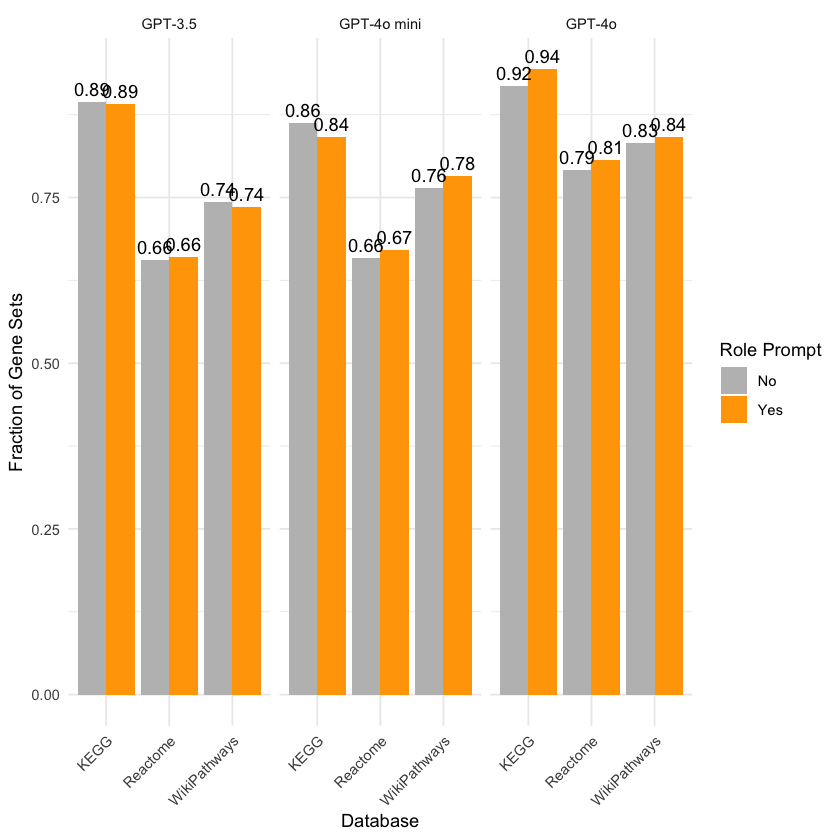

In [21]:
# Step 1: Group by 'database', 'model', and 'gene_set' and calculate the proportion of p_val_adj < 0.01
df_proportion <- df %>%
  group_by(database, model, gene_set) %>%
  summarize(proportion = mean(p_val_adj < 0.01)) %>%
  ungroup()

# Step 2: Replace values in 'gene_set' for better legend display
df_proportion <- df_proportion %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_norole" ~ "No",
    gene_set == "llm_genes_role" ~ "Yes",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

# Step 3: Create a bar plot faceted by 'model' with gene_set for fill and a custom color palette
p <- ggplot(df_proportion, aes(x = database, y = proportion, fill = gene_set)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create grouped bar plot (side-by-side bars)
  geom_text(aes(label = round(proportion, 2)),      # Add rounded proportions as labels
            position = position_dodge(width = 0.9), vjust = -0.5) +  # Adjust label position
  theme_minimal() +  # Use a minimal theme
  labs(x = "Database", y = "Fraction of Gene Sets", fill = "Role Prompt") +  # Set axis and legend labels
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  facet_wrap(~ model) +  # Facet by 'model'
  scale_fill_manual(values = c("No" = "gray", "Yes" = "orange"))  

p

In [22]:
ggsave(p, file="figures/figS1C.pdf", width=8.75, height=5)

## Figure S1D - HGCN gene symbols

In [24]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")
df <- df %>% filter(gene_set %in%  c("llm_genes_role") )
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 44085 Columns: 17
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


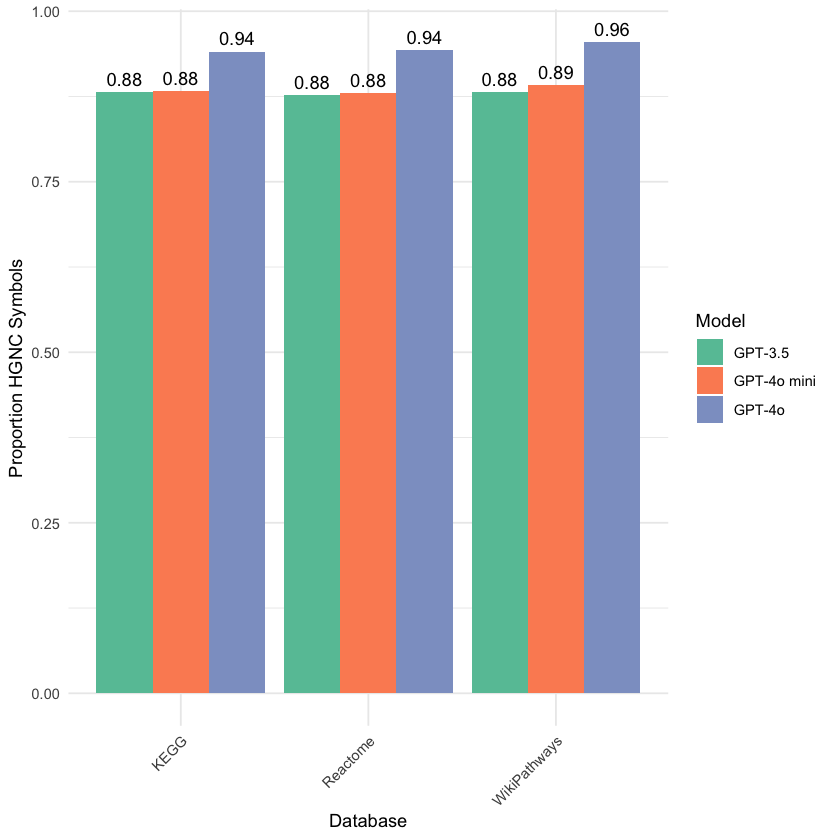

In [25]:
# Step 1: Group by 'database' and 'model', compute the sum for 'non_hgnc' and 'nllm'
df_grouped <- df %>%
  group_by(database, model) %>%
  summarize(
    sum_non_hgnc = sum(non_hgnc, na.rm = TRUE),  # Sum of non_hgnc
    sum_nllm = sum(nllm, na.rm = TRUE)  # Sum of nllm
  ) %>%
  ungroup()  # Ungroup the data frame

# Step 2: Compute the ratio '1 - (sum_non_hgnc / sum_nllm)'
df_grouped <- df_grouped %>%
  mutate(ratio = 1 - (sum_non_hgnc / sum_nllm))

# Step 3: Create a bar plot with 'database' on the x-axis, 'ratio' on the y-axis, grouped by 'model'
p <- ggplot(df_grouped, aes(x = database, y = ratio, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create grouped bar plot (side-by-side bars)
  geom_text(aes(label = round(ratio, 2)),             # Add rounded values on top of the bars
            position = position_dodge(width = 0.9), 
            vjust = -0.5) +                           # Adjust the vertical position of the labels
  labs(x = "Database", y = "Proportion HGNC Symbols", fill = "Model") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set2")  # Use Set2 color scheme for the bars
p

In [26]:
ggsave(p, file="figures/figS1D.pdf", width=6.75,heigh=4.75)

`summarise()` has grouped output by 'database'. You can override using the `.groups` argument.


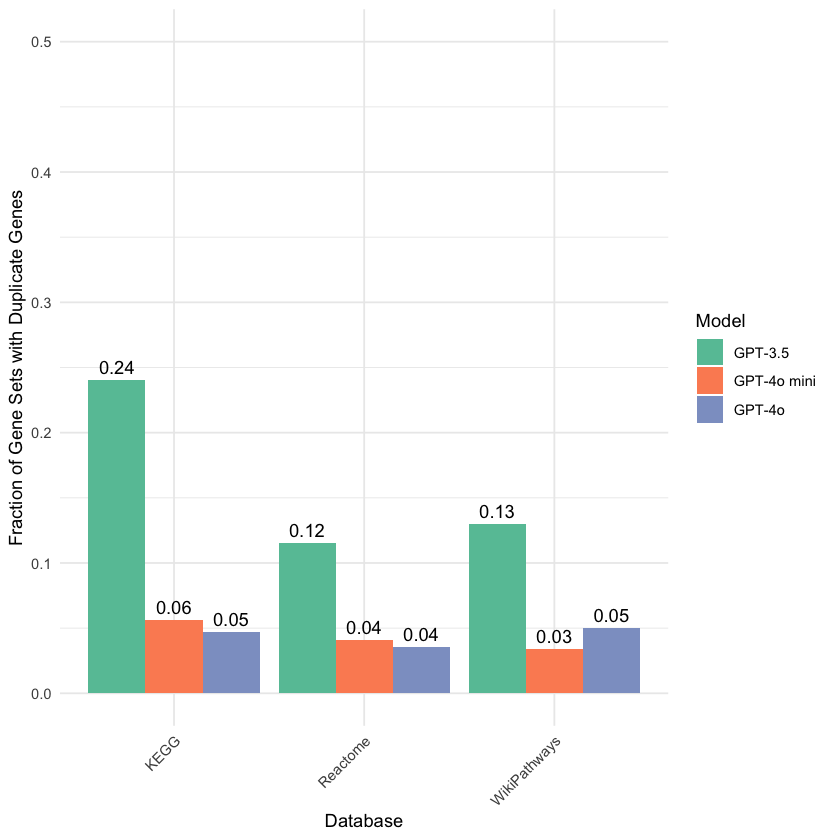

In [27]:

# Step 1: Group by 'database' and 'model' and calculate the fraction where 'ndup > 0'
df_fraction <- df %>%
  group_by(database, model) %>%
  summarize(fraction_ndup_gt_0 = mean(ndup > 0, na.rm = TRUE)) %>%
  ungroup()

# Step 2: Create a bar plot with 'database' on the x-axis and the fraction on the y-axis, grouped by 'model'
p <- ggplot(df_fraction, aes(x = database, y = fraction_ndup_gt_0, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create grouped bar plot (side-by-side bars)
  geom_text(aes(label = round(fraction_ndup_gt_0, 2)),  # Add the fraction on top of the bars
            position = position_dodge(width = 0.9), 
            vjust = -0.5) +  # Adjust vertical position of the labels
  scale_y_continuous(limits = c(0, 0.5)) +  # Set the y-axis limits between 0 and 0.5
  labs(x = "Database", y = "Fraction of Gene Sets with Duplicate Genes", fill = "Model") +  # Update axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set2")  # Use Set2 color scheme for the bars
p

In [28]:
ggsave(p, file="figures/figS1E.pdf", width=6.75,heigh=4.75)

## Figure S1F

In [29]:
df <- readr::read_tsv("outputs/tok_use.tsv")
df <- df %>% filter(gene_set %in%  c("llm_genes_role") )
# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))
df
# Step 2: Update database names
df <- df %>%
  mutate(lib_name = case_when(
    lib_name == "KEGG_2021_Human" ~ "KEGG",
    lib_name == "Reactome_2022" ~ "Reactome",
    lib_name == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ lib_name  # Leave other values unchanged
  ))


# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))

df

Rows: 45 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): lib_name, model, gene_set
dbl (2): in_toks, out_toks

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


lib_name,model,gene_set,in_toks,out_toks
<chr>,<chr>,<chr>,<dbl>,<dbl>
KEGG_2021_Human,GPT-4o mini,llm_genes_role,55292,80365
KEGG_2021_Human,GPT-3.5,llm_genes_role,54840,84445
KEGG_2021_Human,GPT-4o,llm_genes_role,55292,95722
Reactome_2022,GPT-4o mini,llm_genes_role,328686,405673
Reactome_2022,GPT-3.5,llm_genes_role,326126,317823
Reactome_2022,GPT-4o,llm_genes_role,328686,454958
WikiPathway_2023_Human,GPT-4o mini,llm_genes_role,144688,181465
WikiPathway_2023_Human,GPT-3.5,llm_genes_role,143878,162885
WikiPathway_2023_Human,GPT-4o,llm_genes_role,144688,199598


lib_name,model,gene_set,in_toks,out_toks
<chr>,<fct>,<chr>,<dbl>,<dbl>
KEGG,GPT-4o mini,llm_genes_role,55292,80365
KEGG,GPT-3.5,llm_genes_role,54840,84445
KEGG,GPT-4o,llm_genes_role,55292,95722
Reactome,GPT-4o mini,llm_genes_role,328686,405673
Reactome,GPT-3.5,llm_genes_role,326126,317823
Reactome,GPT-4o,llm_genes_role,328686,454958
WikiPathways,GPT-4o mini,llm_genes_role,144688,181465
WikiPathways,GPT-3.5,llm_genes_role,143878,162885
WikiPathways,GPT-4o,llm_genes_role,144688,199598


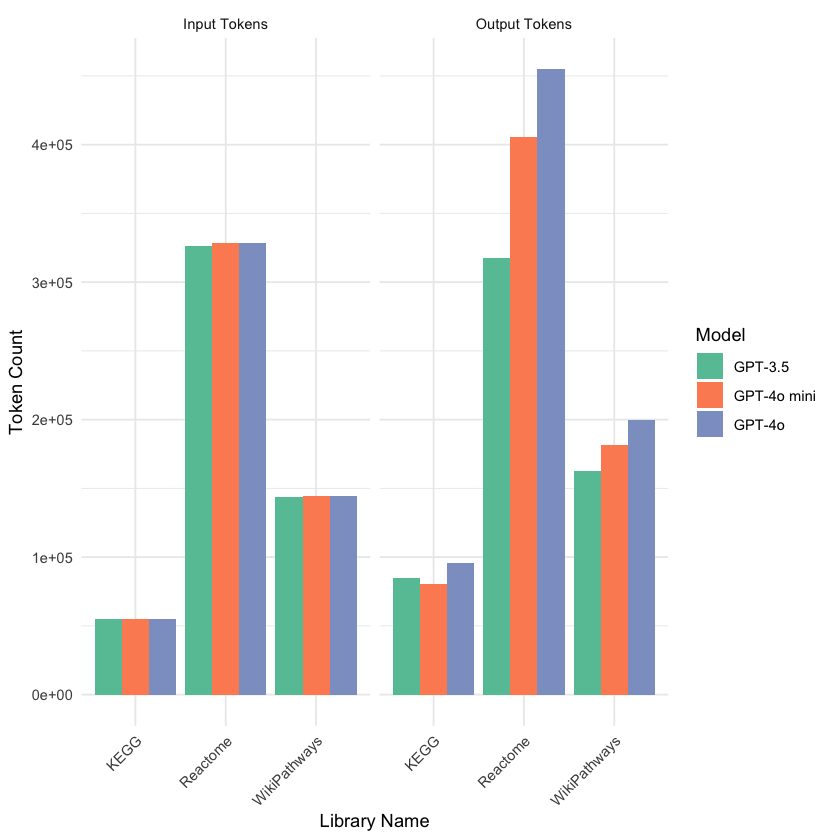

In [37]:

# Step 1: Reshape the data to gather 'in_toks' and 'out_toks' into a single column
df_long <- df %>%
  pivot_longer(cols = c(in_toks, out_toks), names_to = "token_type", values_to = "token_count")

# Step 2: Create a custom labeller function to relabel facet titles
facet_labels <- c("in_toks" = "Input Tokens", "out_toks" = "Output Tokens")

# Step 3: Create a bar plot grouped by 'lib_name' and 'model', with facets for 'in_toks' and 'out_toks'
p <- ggplot(df_long, aes(x = lib_name, y = token_count, fill = model)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create grouped bar plot (side-by-side bars)
  facet_wrap(~ token_type, labeller = as_labeller(facet_labels)) +  # Custom facet labels
  labs(x = "Library Name", y = "Token Count", fill = "Model") +  # Set axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set2")  # Apply Set2 color palette to the fill
p

In [38]:
ggsave(p, file="figures/figS1F.pdf",width=6.75,heigh=4.75)

In [55]:
# Compute the sum of 'in_toks' and 'out_toks' for each 'model'
df_sum <- df %>%
  group_by(model) %>%
  summarize(
    sum_in_toks = sum(in_toks, na.rm = TRUE),   # Sum of 'in_toks'
    sum_out_toks = sum(out_toks, na.rm = TRUE)  # Sum of 'out_toks'
  )

# View the result
df_sum

model,sum_in_toks,sum_out_toks
<fct>,<dbl>,<dbl>
GPT-3.5,524844,565153
GPT-4o mini,528666,667503
GPT-4o,528666,750278


Cost associated with tokens.

In [58]:
528666/1e6 * 5 + 750278 / 1e6 * 15

[1] 13.8975

In [39]:
528666/1e6 * 0.150 + 667503 / 1e6 * 0.6

[1] 0.4798017